In [13]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD, NCG, LBFGS
from isanet.optimizer.utils import l_norm
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import matplotlib.pyplot as plt
import numpy as np
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    reg = 1e-4
    model.add(4, input= 17, kernel_initializer = 1/np.sqrt(17), kernel_regularizer = reg)
    model.add(1, kernel_initializer = 1/np.sqrt(4), kernel_regularizer = reg)

    print("norm_w0: {}".format(l_norm(model.weights)))
    print("sum_w0: {}".format([np.sum(np.square(x)) for x in model.weights]))
    model.set_optimizer(optimizer)
    start = time.time()
    model.fit(X_train,
            Y_train, 
            epochs=1000, 
            verbose=verbose)
    end = time.time()
    return model, (end - start)

def ls_stat(info):
    converged = 0
    tot_iteration = 0
    tot = len(info["ls_conv"])
    for i in range(tot):
        tot_iteration += info["ls_it"][i] + info["zoom_it"][i]
        if info["ls_conv"][i] == "y":
            converged += 1
    
    print("Ls Hit Rate: {}".format(converged/tot))
    print("Ls iteration: {}".format(tot_iteration))

# Monk 2 ln_maxiter = 10

In [80]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("2", "train")

seed = 276
ln_maxiter = 10
results = []
eps = 1e-5

Load Monk DataSet


In [81]:
#############################
#          NCG pr
#############################

optimizer = NCG(beta_method="pr", c1=1e-4, c2=.2, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr = model.history 

Build the model
norm_w0: 1.3259352460021714
sum_w0: [1.3741994472927885, 0.3839048292980504]
| beta: 0 | alpha: 16.0 | ng: 0.006415418808027555 | ls conv: y, it: 4, time: 0.0484 | zoom used: n, conv: -, it: 0|
Epoch: 1 - time: 0.0510 - loss_train: 0.2365949192710561 - loss_val: 0
| beta: 2.3841874292204377 | alpha: 64.0 | ng: 0.010067375178124295 | ls conv: y, it: 6, time: 0.0065 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0104 - loss_train: 0.23405135055249135 - loss_val: 0
| beta: 2.595559355358492 | alpha: 4.986764488211329 | ng: 0.013061496934707333 | ls conv: y, it: 3, time: 0.0049 | zoom used: y, conv: y, it: 0|
Epoch: 3 - time: 0.0084 - loss_train: 0.2337594043819776 - loss_val: 0
| beta: -0.021299636573393333 | alpha: 79.94122914123132 | ng: 0.008038811186031352 | ls conv: y, it: 7, time: 0.0169 | zoom used: y, conv: y, it: 0|
Epoch: 4 - time: 0.0236 - loss_train: 0.2311654164749439 - loss_val: 0
| beta: 8.064078501303866 | alpha: 8.0 | ng: 0.02277823146610375 | ls conv:

In [82]:
#############################
#          NCG pr+
#############################

optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.2, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr_plus = model.history 

Build the model
norm_w0: 1.3259352460021714
sum_w0: [1.3741994472927885, 0.3839048292980504]
| beta: 0 | alpha: 16.0 | ng: 0.006415418808027555 | ls conv: y, it: 4, time: 0.0047 | zoom used: n, conv: -, it: 0|
Epoch: 1 - time: 0.0096 - loss_train: 0.2365949192710561 - loss_val: 0
| beta: 2.3841874292204377 | alpha: 64.0 | ng: 0.010067375178124295 | ls conv: y, it: 6, time: 0.0074 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0093 - loss_train: 0.23405135055249135 - loss_val: 0
| beta: 2.595559355358492 | alpha: 4.986764488211329 | ng: 0.013061496934707333 | ls conv: y, it: 3, time: 0.0094 | zoom used: y, conv: y, it: 0|
Epoch: 3 - time: 0.0132 - loss_train: 0.2337594043819776 - loss_val: 0
| beta: 0 | alpha: 64.0 | ng: 0.008038811186031352 | ls conv: y, it: 6, time: 0.0134 | zoom used: n, conv: -, it: 0|
Epoch: 4 - time: 0.0251 - loss_train: 0.23139718590661398 - loss_val: 0
| beta: 6.6841568594598755 | alpha: 8.0 | ng: 0.020972605705025668 | ls conv: y, it: 3, time: 0.0054 | zoom

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


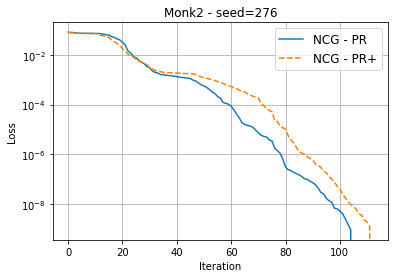

In [83]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse_reg"] - h_pr["loss_mse_reg"][-1], linestyle='-')
plt.plot(h_pr_plus["loss_mse_reg"] - h_pr_plus["loss_mse_reg"][-1], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')
plt.savefig('./plot/monk2_pr_pr+_1.eps', format='eps')
plt.show()


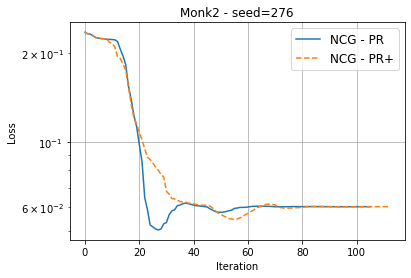

In [84]:
pos_train = (0,0)
figsize = (12, 4)
zoom = 300
plt.plot(h_pr["loss_mse"][:zoom], linestyle='-')
plt.plot(h_pr_plus["loss_mse"][:zoom], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')    
plt.show()

# Monk 2 ln_maxiter = 100

In [69]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("2", "train")

seed = 189
ln_maxiter = 100
results = []
eps = 1e-5

Load Monk DataSet


In [71]:
#############################
#          NCG pr
#############################

optimizer = NCG(beta_method="pr", c1=1e-4, c2=.2, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr = model.history 

Build the model
norm_w0: 1.2238719891962089
sum_w0: [1.3360066003125781, 0.16185604562650696]
| beta: 0 | alpha: 4.0 | ng: 0.10017989156669921 | ls conv: y, it: 2, time: 0.0024 | zoom used: n, conv: -, it: 0|
Epoch: 1 - time: 0.0080 - loss_train: 0.23768754046113344 - loss_val: 0
| beta: -0.028043955619377624 | alpha: 128.0 | ng: 0.006354344426101755 | ls conv: y, it: 7, time: 0.0090 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0108 - loss_train: 0.23567530258439134 - loss_val: 0
| beta: 0.18655488599038594 | alpha: 64.0 | ng: 0.0032328225450138815 | ls conv: y, it: 6, time: 0.0058 | zoom used: n, conv: -, it: 0|
Epoch: 3 - time: 0.0074 - loss_train: 0.23530490853852432 - loss_val: 0
| beta: 12.967219759811545 | alpha: 40.69249261121942 | ng: 0.011673022438308126 | ls conv: y, it: 6, time: 0.0118 | zoom used: y, conv: y, it: 0|
Epoch: 4 - time: 0.0142 - loss_train: 0.23020456848792764 - loss_val: 0
| beta: -0.1238664821005738 | alpha: 5.02020859020845 | ng: 0.007636456193339342 |

In [72]:
#############################
#          NCG pr+
#############################

optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.2, ln_maxiter = ln_maxiter, norm_g_eps = 1e-9, l_eps = 1e-9)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr_plus = model.history 

Build the model
norm_w0: 1.2238719891962089
sum_w0: [1.3360066003125781, 0.16185604562650696]
| beta: 0 | alpha: 4.0 | ng: 0.10017989156669921 | ls conv: y, it: 2, time: 0.0034 | zoom used: n, conv: -, it: 0|
Epoch: 1 - time: 0.0080 - loss_train: 0.23768754046113344 - loss_val: 0
| beta: 0 | alpha: 16.0 | ng: 0.006354344426101755 | ls conv: y, it: 4, time: 0.0045 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0066 - loss_train: 0.23731157487094062 - loss_val: 0
| beta: 1.7132513797850517 | alpha: 32.0 | ng: 0.008721588960038737 | ls conv: y, it: 5, time: 0.0064 | zoom used: n, conv: -, it: 0|
Epoch: 3 - time: 0.0081 - loss_train: 0.23592988315708105 - loss_val: 0
| beta: 1.9832707098754039 | alpha: 8.0 | ng: 0.009593147506068794 | ls conv: y, it: 3, time: 0.0061 | zoom used: n, conv: -, it: 0|
Epoch: 4 - time: 0.0079 - loss_train: 0.2355656751896193 - loss_val: 0
| beta: 0 | alpha: 44.46266591810937 | ng: 0.003723119633384398 | ls conv: y, it: 6, time: 0.0048 | zoom used: y, conv: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


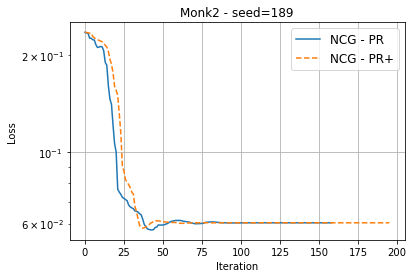

In [73]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse"], linestyle='-')
plt.plot(h_pr_plus["loss_mse"], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')  
plt.savefig('./plot/monk2_pr_pr+_2.eps', format='eps')
plt.show()

# Monk 1 ln_maxiter = 100 seed 108

In [18]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    reg = 1e-4
    model.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = reg)
    model.add(1, kernel_initializer = 0.003, kernel_regularizer = reg)

    model.set_optimizer(optimizer)

    start = time.time()
    model.fit(X_train,
            Y_train, 
            epochs=1000, 
            verbose=verbose)
    end = time.time()
    return model, (end - start)


def ls_stat(info):
    converged = 0
    tot_iteration = 0
    tot = len(info["ls_conv"])
    for i in range(tot):
        tot_iteration += info["ls_it"][i] + info["zoom_it"][i]
        if info["ls_conv"][i] == "y":
            converged += 1
    
    print("Ls Hit Rate: {}".format(converged/tot))
    print("Ls iteration: {}".format(tot_iteration))

In [19]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")

seed = 108 #206 #874 #206 #56
ln_maxiter = 100
results = []
eps = 1e-5

Load Monk DataSet


In [20]:
#############################
#          NCG pr
#############################
optimizer = NCG(beta_method="pr", c1=1e-4, c2=.1, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr = model.history 

Build the model
| beta: 0 | alpha: 5.566274812341263 | ng: 0.00027196969334937796 | ls conv: y, it: 3, time: 0.0056 | zoom used: y, conv: y, it: 0|
Epoch: 1 - time: 0.0082 - loss_train: 0.24999976215715983 - loss_val: 0
| beta: 0.42409346731502234 | alpha: 34270.22720446321 | ng: 0.00017711332688074075 | ls conv: y, it: 16, time: 0.0193 | zoom used: y, conv: y, it: 1|
Epoch: 2 - time: 0.0213 - loss_train: 0.15817693826581206 - loss_val: 0
| beta: 59302.07818817406 | alpha: 0.002936841863618843 | ng: 0.04315330431633113 | ls conv: y, it: 0, time: 0.0071 | zoom used: y, conv: y, it: 6|
Epoch: 3 - time: 0.0127 - loss_train: 0.1581744623702153 - loss_val: 0
| beta: -0.0033744890419960343 | alpha: 4.0 | ng: 0.04300540157407618 | ls conv: y, it: 2, time: 0.0040 | zoom used: n, conv: -, it: 0|
Epoch: 4 - time: 0.0080 - loss_train: 0.15405461580420618 - loss_val: 0
| beta: 0.2295849535119642 | alpha: 32.0 | ng: 0.02472795975305575 | ls conv: y, it: 5, time: 0.0125 | zoom used: n, conv: -, it: 

In [21]:
#############################
#          NCG pr+
#############################
optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.1, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr_plus = model.history 

Build the model
| beta: 0 | alpha: 5.566274812341263 | ng: 0.00027196969334937796 | ls conv: y, it: 3, time: 0.0039 | zoom used: y, conv: y, it: 0|
Epoch: 1 - time: 0.0066 - loss_train: 0.24999976215715983 - loss_val: 0
| beta: 0.42409346731502234 | alpha: 34270.22720446321 | ng: 0.00017711332688074075 | ls conv: y, it: 16, time: 0.0121 | zoom used: y, conv: y, it: 1|
Epoch: 2 - time: 0.0139 - loss_train: 0.15817693826581206 - loss_val: 0
| beta: 59302.07818817406 | alpha: 0.002936841863618843 | ng: 0.04315330431633113 | ls conv: y, it: 0, time: 0.0023 | zoom used: y, conv: y, it: 6|
Epoch: 3 - time: 0.0038 - loss_train: 0.1581744623702153 - loss_val: 0
| beta: 0 | alpha: 4.429968426570965 | ng: 0.04300540157407618 | ls conv: y, it: 3, time: 0.0022 | zoom used: y, conv: y, it: 0|
Epoch: 4 - time: 0.0049 - loss_train: 0.15402024181226023 - loss_val: 0
| beta: 0.42094200894272055 | alpha: 32.0 | ng: 0.027903471706057108 | ls conv: y, it: 5, time: 0.0088 | zoom used: n, conv: -, it: 0|
Ep

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


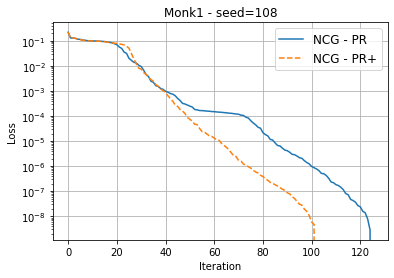

In [22]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse_reg"] - h_pr["loss_mse_reg"][-1], linestyle='-')
plt.plot(h_pr_plus["loss_mse_reg"] - h_pr_plus["loss_mse_reg"][-1], linestyle = '--')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')   
plt.savefig('./plot/monk1_pr_pr+_1.eps', format='eps')
plt.show()

# Monk 1 ln_maxiter = 100 seed 206

In [23]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")

seed = 206 #874 #206 #56
ln_maxiter = 100
results = []
eps = 1e-5

Load Monk DataSet


In [24]:
#############################
#          NCG pr
#############################
optimizer = NCG(beta_method="pr", c1=1e-4, c2=.3, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr = model.history 

Build the model
| beta: 0 | alpha: 4.0 | ng: 0.00034217335525890273 | ls conv: y, it: 2, time: 0.0024 | zoom used: n, conv: -, it: 0|
Epoch: 1 - time: 0.0069 - loss_train: 0.2499999571723255 - loss_val: 0
| beta: 0.003952768752198836 | alpha: 108020.65469293669 | ng: 0.00010493516242355271 | ls conv: y, it: 17, time: 0.0321 | zoom used: y, conv: y, it: 1|
Epoch: 2 - time: 0.0330 - loss_train: 0.17981540075390332 - loss_val: 0
| beta: 1100559.2684947627 | alpha: 0.0006811481795748424 | ng: 0.11008518309885938 | ls conv: y, it: 0, time: 0.0062 | zoom used: y, conv: y, it: 8|
Epoch: 3 - time: 0.0090 - loss_train: 0.1798110975055273 - loss_val: 0
| beta: 0.007053852083289621 | alpha: 1.4011890547418053 | ng: 0.1108538346561147 | ls conv: y, it: 1, time: 0.0059 | zoom used: y, conv: y, it: 0|
Epoch: 4 - time: 0.0102 - loss_train: 0.17096057863038772 - loss_val: 0
| beta: 0.36968319299723335 | alpha: 8.0 | ng: 0.06866930733254191 | ls conv: y, it: 3, time: 0.0040 | zoom used: n, conv: -, it:

In [25]:
#############################
#          NCG pr+
#############################
optimizer = NCG(beta_method="pr+", c1=1e-4, c2=.3, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_pr_plus = model.history 

Build the model
| beta: 0 | alpha: 4.0 | ng: 0.00034217335525890273 | ls conv: y, it: 2, time: 0.0032 | zoom used: n, conv: -, it: 0|
Epoch: 1 - time: 0.0063 - loss_train: 0.2499999571723255 - loss_val: 0
| beta: 0.003952768752198836 | alpha: 108020.65469293669 | ng: 0.00010493516242355271 | ls conv: y, it: 17, time: 0.0177 | zoom used: y, conv: y, it: 1|
Epoch: 2 - time: 0.0212 - loss_train: 0.17981540075390332 - loss_val: 0
| beta: 1100559.2684947627 | alpha: 0.0006811481795748424 | ng: 0.11008518309885938 | ls conv: y, it: 0, time: 0.0053 | zoom used: y, conv: y, it: 8|
Epoch: 3 - time: 0.0070 - loss_train: 0.1798110975055273 - loss_val: 0
| beta: 0.007053852083289621 | alpha: 1.4011890547418053 | ng: 0.1108538346561147 | ls conv: y, it: 1, time: 0.0024 | zoom used: y, conv: y, it: 0|
Epoch: 4 - time: 0.0039 - loss_train: 0.17096057863038772 - loss_val: 0
| beta: 0.36968319299723335 | alpha: 8.0 | ng: 0.06866930733254191 | ls conv: y, it: 3, time: 0.0036 | zoom used: n, conv: -, it:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


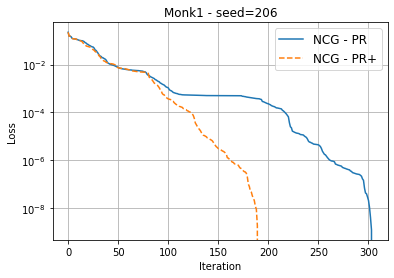

In [26]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_pr["loss_mse_reg"] - h_pr["loss_mse_reg"][-1], linestyle='-')
plt.plot(h_pr_plus["loss_mse_reg"] - h_pr_plus["loss_mse_reg"][-1], linestyle = '--')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')   
plt.savefig('./plot/monk1_pr_pr+_2.eps', format='eps')
plt.show()